# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# displaying dataset shape
print "This dataset has {} data points with {} variables each.".format(*data.shape)

# Success - Display the first 8 and last 2 records
print "first 8 items/rows of data:", display(data.head(n=8))
print "last 2 items/rows of data:", display(data.tail(n=2))

# checks on income
print "first 8 items/string of income:", display(data.income.head(n=8))
print "last 2 items/string of income:", display(data.income.head(n=2))

# check that the labels are all clean
# counter reports when income[i] are different from "<=50k" or ">50k")
counter_wrong_labels = 0
for i in range (0,len(data.income)):
    if ((data.income[i] != "<=50K") & (data.income[i] != ">50K")): counter_wrong_labels += 1
print "(income) amount of missing / wrong labels:", counter_wrong_labels # should be 0

# checks for missing values in data fields "NaN" - syntax found on stackoverflow
print "(data) empty fields:", [data.iloc[i,j] for i,j in zip(*np.where(pd.isnull(data)))] # and the result is empty


This dataset has 45222 data points with 14 variables each.
first 8 items/rows of data:

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


 None
last 2 items/rows of data:

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


 None
first 8 items/string of income:

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
Name: income, dtype: object

 None
last 2 items/string of income:

0    <=50K
1    <=50K
Name: income, dtype: object

 None
(income) amount of missing / wrong labels: 0
(data) empty fields: []


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]
# print "the total number of records is:", n_records

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# n_greater_50k = 0
# for i in range(0,len(data.income)):
#    if (data.income[i] == ">50K"): n_greater_50k += 1
# print "amount of datapoints ABOVE 50k:",n_greater_50k
  
# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])
# n_at_most_50k = 0
# for i in range(0,len(data.income)):
#    if (data.income[i] == "<=50K"): n_at_most_50k += 1
# print "amount of datapoints BELOW or EQUAL 50k:",n_at_most_50k

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = float(100) * n_greater_50k / n_records # float is important here
# print "percentage of individuals whose income is more than 50k (%):", greater_percent

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)
print ""
print "Here we can see some class imbalance / this might have an impact on model performance - Let's keep this in mind"

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%

Here we can see some class imbalance / this might have an impact on model performance - Let's keep this in mind


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

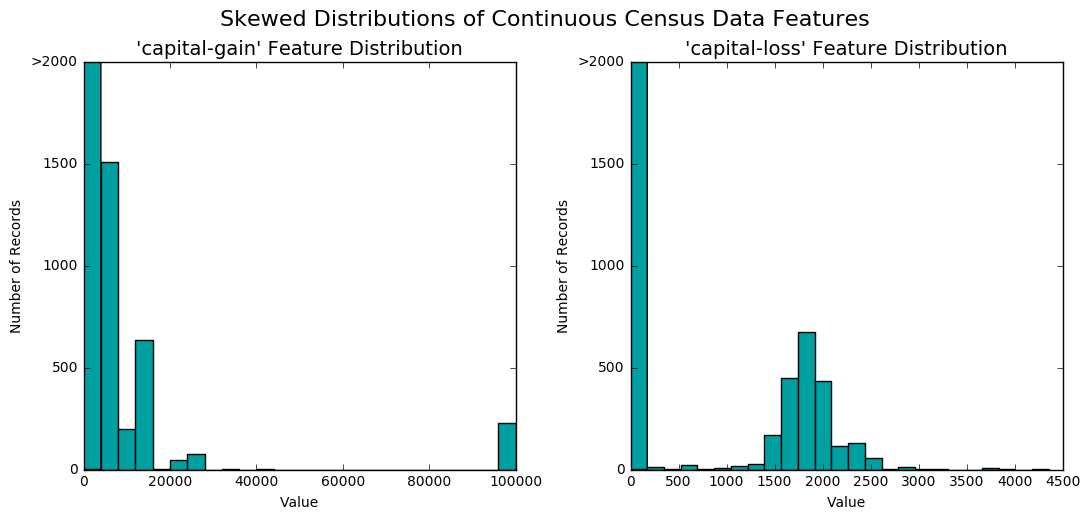

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# also possible with: income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

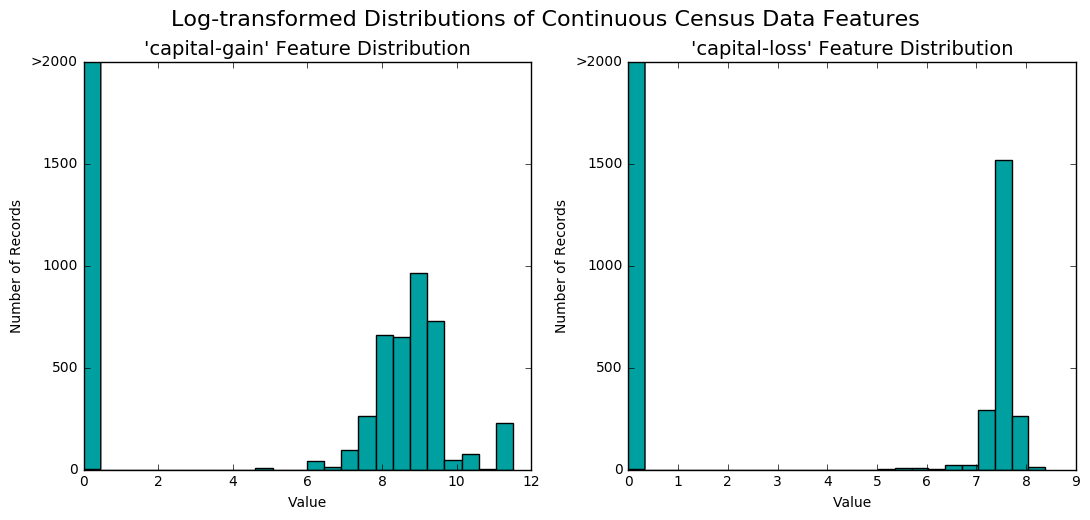

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler    
# MinMAxScaler transforms features by scaling each feature to a given range, default is (0,1)

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 8))
display(features_raw.tail(n = 2))
# all transformed numericals now between 0 and 1

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.00000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.00000,0.0,0.153061,Jamaica
7,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.448980,United-States


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
45220,0.369863,Private,Bachelors,0.8,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.054551,0.0,0.397959,United-States
45221,0.246575,Self-emp-inc,Bachelors,0.8,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.602041,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
from sklearn.preprocessing import LabelEncoder

# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features_raw = pd.get_dummies(features_raw)
# checks
display(features_raw.head(n = 8))
display(features_raw.tail(n = 2))
print ""

# TODO: Encode the 'income_raw' data to numerical values - income_raw = to be encoded
le = LabelEncoder()
le.fit(income_raw)
print "(income_raw) classes:", le.classes_ # these are the 2 classes from label income_raw 
income_raw = le.transform(income_raw) 
print ""
# checking we are getting 0s and 1s
print "first 8 of income_raw:"
for i in range(0,8): print income_raw[i]
print ""
print "last 2 of income_raw:"
for j in range(len(income_raw)-2, len(income_raw)): print income_raw[j]
print ""
    
# Print the number of features after one-hot encoding
encoded = list(features_raw.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded
print ""
print "from 13 features to 103 !!!"
print ""

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.273973,0.866667,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.438356,0.266667,0.00000,0.0,0.153061,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.479452,0.533333,0.00000,0.0,0.448980,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
45220,0.369863,0.8,0.054551,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45221,0.246575,0.8,0.000000,0.0,0.602041,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0



(income_raw) classes: ['<=50K' '>50K']

first 8 of income_raw:
0
0
0
0
0
0
0
1

last 2 of income_raw:
0
1

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-abse

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, income_raw, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [8]:
#
# From the percentage calculation before, we know that 24% of the people from the dataset make more thann 50k.
# Chosing a model always predicting an individual makes more than 50k means being wrong in (100-24)=76% of the cases
# 
# TODO: Calculate accuracy
accuracy = greater_percent * 0.01 # less than throwing a coin / random guessing

# TODO: Calculate F-score using the formula above for beta = 0.5
# 
# precision = accuracy 
# recall = true positive / (true positive + false negative)
# false negative = 0 => recall = 1
fscore = (1.25 * accuracy) / (0.25 * accuracy + 1)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **
Here is my choice, intentionally spread over ensemble, parametric and non-parametric algorithms.

The information provided is a mix of information from the course, from the internet (quora.com, stackoverflow.com, kaggle.com) and from the book "applied predictive modeling" from Max Kuhn & Kjell Johnson

--- Logistic Regression ---
- real world application: image segementation & categorization; geographic image processing; handwriting recognition; analyzing a big group of people for a given disease and over a huge amount of time in healthcare; in combination with SVM for predicting whether a person is depressed or not based on bag of words from a corpus.
- strengths: interpretable; at the opposite of linear regression, logistic regression can also be applied to non-linearly separable datasets / processes; Computation time is lower than more "complex" algorithms.
- weaknesses: logistic regression has no tunning parameters and needs dataset pre-processing: centering, scaling, removing near-zero predictors, remove highly correlated predictors => let's keep this in mind for the rest of this project because this makes logistic regression sensitive to predictor noise
- why this model: because it can be used for predicting the probability of an event, because it is interpretable, because it is fast and because it is simple (it is always good to start withsomething simple). 

--- KNN ---
- real world application: face recognition where KNN is combined with feature extraction (PCA) and dimension reduction in the pre-processing phase where KNN is used to identify a person by comparing it to a list (it is impractical to train a separate model for each of the faces on this list); "similarity searches" where you want to "find something similar to another thing" (Concept search for documents, recommender systems like the one from Amazon "people who bought this also bought that");
- strengths: lazy model, i.e. performs computation only when necesary because there is no training; easy to use and helpful for highly unstructured datasets with outliars & redundancy; one parameter can be tuned (K); robust to predictor noise when using "inverse square of weighted distance"; low computation time in "training" phase (no training!), but computation time could be high in "predicting" phase; effective on very large training data
- weaknesses: is very depending on the metrics and requires domain knowledge; treats all datapoints equally from a significance point of view; requires data pre-processing (centering, scaling, removing near-zero predictors)
- why this model: this is a non-parametric algorithm I would like to check. Easy and helpful for highly unstructured datasets. 

--- Gradient Boosting ---
- real world application: intrusion detection systems; customer churn detection (to address potentially leaving customers with retention offers); email spam detection etc.
- strengths: powerful method that can effectively capture non-linear dependencies; can be tuned according to the needs of various applications with a limited number of hyperparamaters (3); good results with mixed features categorical/numerical; robust to predictor noise; no need for data pre-processing (centering, scaling, removing near-zero predictors, removing highly correlated predictors)
- weaknesses: computation time. Specifically, if accurary is very important for an application and to avoid overfitting, the amount of boosting iterations used for learning can be very high and requires massive storage for all parameters of the fitted base-learners; In the case of a huge-amount of base learners, overall prediction speed is also impaired because all the base-learners need to run the prediction.
- why this model: low bias and low overfitting


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[0:sample_size], y_train[0:sample_size])
    end = time() # Get end time
    # TODO: Calculate the training time
    results['train_time'] = (end-start)
    
    # TODO: Get the predictions on the test set,
    predictions_test = learner.predict(X_test)
    
    #       then get predictions on the first 300 training samples
    start = time()
    predictions_train = learner.predict(X_train[:300])
    end = time()
    results['pred_time'] = (end-start)
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train[:300])
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train[:300], beta=0.5)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

1%: 361
10%: 3617
100%: 36177
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


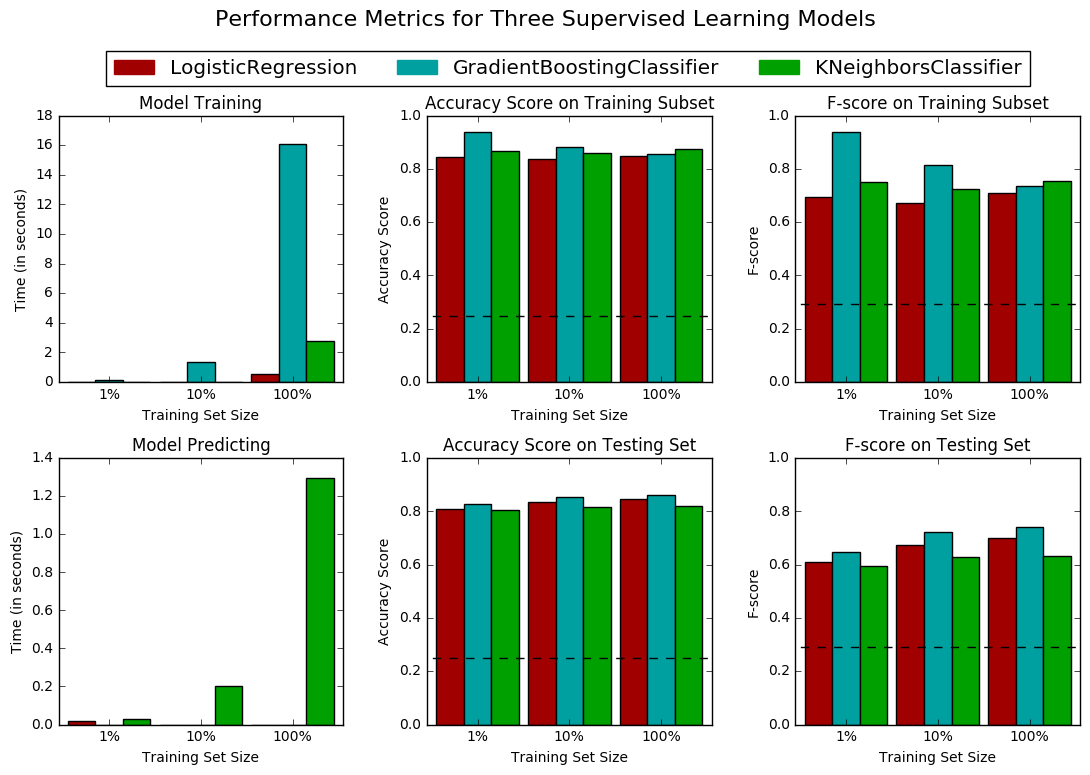

In [10]:
# TODO: Import the three supervised learning models from sklearn

# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier

#  Note to the reviewer: I have saved your last report and your advice to try XGBoost -  I have figured out that 
# this model doesn't belong to sklearn, so will try it later on when I have more time (I usually waste a lot of time
# when installing new libraries on my company's PC, be it with conda or not)

# TODO: Initialize the three models
# clf_A = SVC(random_state = 0)
# clf_B = GaussianNB()
# clf_B = DecisionTreeClassifier()
# clf_B = SGDClassifier(loss="hinge", penalty="l2", shuffle = True)
# clf_B = AdaBoostClassifier(n_estimators=100, random_state = 0)
# clf_B = RandomForestClassifier(n_estimators=10, random_state =0)
clf_A = LogisticRegression(random_state = 0)
clf_B = KNeighborsClassifier()
# clf_B = DecisionTreeClassifier()
clf_C = GradientBoostingClassifier(random_state=0, verbose=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int( len(X_train)/100 )
print "1%:", samples_1
samples_10 = int( len(X_train)/10 )
print "10%:", samples_10
samples_100 = int( len(X_train) )
print "100%:", samples_100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **

Preliminary remarks:
1. We have the visual confirmation that prediction time is much higher than training time for KNN, the non-parametric algorithm.
2. Gradient Boosting has the best accuracy & F- scores on the testing set, whatever the training set size. 
3. Logistic Regression is very fast and brings an interesting accuracy even if slightly behind Gradient Boosting
4. as expected, the accuracy and F- scores on the testing set increase for all models along with a growing training set size

Message to CharityML:
The most appropriate model I have found for this application is the "Gradient Boosting Classifier":
     > Gradient Boosting has the best accuracy and F-test score on the testing set
     > Gradient Boosting hasn't the best training time but this model is not going to be used in a real-time application, i.e. we have time to train the model for the best predictive performance "offline" (upfront to the prediction time). So traning speed is not the number 1 criteria here (same for prediction speed).
     > Gradient Boosting is well suited to this dataset. It is even better suited with decision trees as base-learner, because decision trees are very good at detecting non-trivial relationships between features
     > Gradient Boosting can be further optimized / customized (loss function, base-learner)
     
...and this is the model I would like to further optimize by finding out the optimal hyperparameters.

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

My answer here is a mix of what I have learnt from the nanodegree videos, what I have read on http://scikit-learn.org,  www.kdnuggets.com, quora.com and the book "Applied Predictive Modeling" from Max Kuhn and Kjell Johneon.

Let me take the example of a fictive spam predictor that classifies email into the category "spam" or "not spam". It is constitued of a list of rules like for example:

rule 1 = "an email containing a html link IS spam"
rule 2 = "an email with explicit words IS spam"
rule 3 = "an email with typos ISN'T a spam"

These rules can be considered as "weak base-learners" as long as they can do a prediction job better of 50%, i.e. their accuracy in predicting an email as to be spam or not must be a bit more than bare chance (50%). Here for our gradient boosting algorithm, the base learners are decision trees (DT) which are made "weak" by limiting their depth, also named "stumps" (I don't explain what a DT is).

"Gradient Boosting" is an algorithm which combines and trains "weak base-learners" to build a model that is then used to make predictions. After traininig, the created model is an ensemble of parameters for each of the fitted base-learners, explaining why Gradient Boosting belongs to the category "ensemble learning".  

More in details, "Gradient Boosting" generates a sequence of weak classifiers at the beginning, then it iterates on the 2 following tasks:
 
TASK-1: "Gradient Bossting" takes a sample of the training dataset and tests to see how accurate each learner is. The best base-learner is given a weight depending on its accuracy and added to the ensemble of learners

TASK-2: samples which are wrongly classified get an heavier weight, in order for them to get more attention from the algorithm in the next round 

As a consequence, the first "qualified" base-learners are successful on at least some samples. By iterating on the two tasks listed before, the algorithm "moves on" to find further learners for the samples that were not correctly classified in the previous iteration, "moves on" because it doesn't try to reclassify already correcty classified samples in the previous iterations.

At the end of a given amount of rounds we have an "ensemble" of weighted learners trained and iteratively retrained on misclassified data from the previous rounds.

=> Decision Trees are a low bias & high variance classification technique. The ensemble of trees drives down variance (as explained here) producing models which have low bias & low variance, the ultimate goal of machine learning.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [11]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune

# IMPORTANT INFORMATION FOR THE GRID SEARCH STRATEGY ON GRADIENT BOOSTING
# n_estimators = number of weak learners.
# learning_rate = contribution of each weak learner in the final combination. There is a trade-off between 
# learning_rate and n_estimators
# max_depth = maximum depth of the individual regression estimators (default = 3) = max depth of a decision tree. Tune
# this parameter for best performance; the best value depends on the interaction of the input variables.

hyper_parameters = {'learning_rate': (0.07, 0.075, 0.08),'n_estimators': (100,105,110), 'max_depth': (5,6,7)}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid = hyper_parameters, scoring = scorer, n_jobs = 4)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print "Best parameters are:", grid_fit.best_params_

# Make predictions using the unoptimized and BEST model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Best parameters are: {'n_estimators': 100, 'learning_rate': 0.075, 'max_depth': 6}
Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8688
Final F-score on the testing data: 0.7471


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |        24.78%       |         86.30%    |     86.88%      |
| F-score        |        29.17%       |         73.95%    |     74.71%      |


**Answer: **

We see that the optimized model brings only minor improvements: 
- less than 1 percentage point improved accuracy
- less than 1 percentage point improvement on F-score

=> this shows that Machine Learning is not about brute force computation and that "natural" limits exist in the dataset. The solution to a model performance that is at its limit is to add more data points. This is not possible here, so we need to look into possible issues like class imbalance, predictor noise, and feature importance (among others)


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**

These are the features which in my opinion and without calculation best predict whether a person earns more than UDS50k or less:

1. occupation
2. workclass
3. age
4. education-level
5. capital-gain

- This ranking is based on my internal bias that society is equal for everybody, independant from sex, race, family situation and native-country and a meritocracy (working more means more money)
- I consider "education-num" as highly correlated to "education-level", i.e. education-level is enough, we don't need both
- I consider "capital-loss" as highly correlated to "capital-gain", i.e. capital-gain is enough, we don't need both


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

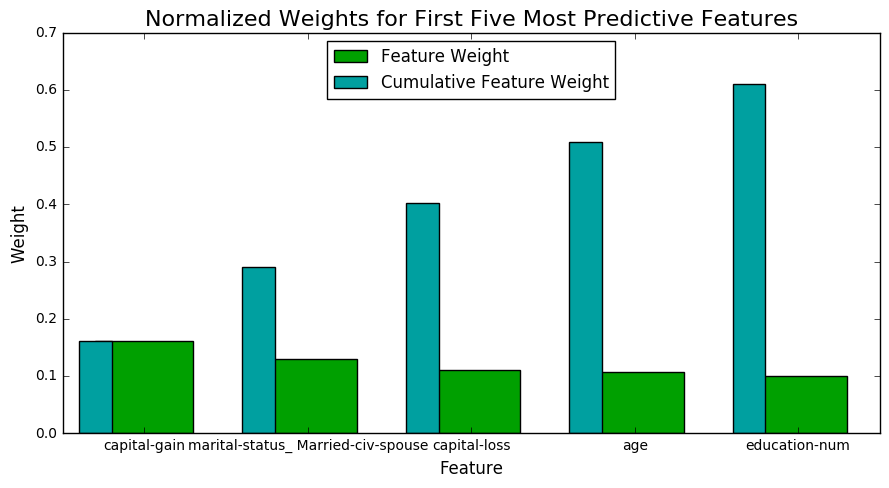

In [12]:
# TODO: Import a supervised learning model that has 'feature_importances_'
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.08, max_depth=6, random_state=0)

# TODO: Train the supervised model on the training set 
model = classifier.fit(X_train, y_train)

# TODO: Extract the feature importances
# importances = model.feature_importances_
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**

From the visualization:
1. capital-gain
2. marital-status-married
3. capital-loss
4. age
5. education-num

I was close to the answer with:
5. capital-gain => but with wrong ranking
3. age => almost correct
4. education-level => which I said is highly correlated to "education-num"

I was really wrong on
1. occupation 
2. workclass
=> no further comment on meritocracy

and
3. capital-loss => which I thought was highly correlated to "capital-gain": I thought that both are about investing in stocks, independently from gain or loss.

Summary
1. capital-gain             => ~CONFIRMATION
2. marital-status-married   => SUPRISE!
3. capital-loss             => SUPRISE!
4. age                      => ~CONFIRMATION
5. education-num            => ~CONFIRMATION

I understand why "marital-status-married" is important because this means that a given person cann afford a family, i.e. has a financial background over the average.

Concerning "capital-loss", I don't understand. I understand and have forecasted that "capital-gain" is a good predictor, but am very suprised and don'tunderstand why BOTH "capital-gain" and "capital-loss" are good predictors.


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [13]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8688
F-score on testing data: 0.7471

Final Model trained on reduced data
------
Accuracy on testing data: 0.8587
F-score on testing data: 0.7246


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model = FIN. MOD. FULL DATA | FIN. MOD. REDUCED DATA |
| :------------: | :-----------------: | :---------------: | :-----------------------------------: | :--------------------: | 
| Accuracy Score |        24.78%       |         86.30%    |                86.88%                 |         85.87%         |
| F-score        |        29.17%       |         73.95%    |                74.71%                 |         72.46%         |

The accuracy and F- scores from the final model with reduced data are very close to the full data one: only 1% below for the accuracy score and a bit more than 2% for the F-score. But the computation time was about a few seconds. So in the case time is a factor for example for a real time application (recommender, live authentication of people from face or voice, any algorithm to command a robot) I would opt for this solution where we only use the x most important features to build the model (here x=5).

Additionally, if computation speed is important, I would reconsider logistic regression, as observed in question 3 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.